# Machine Learning

## This script contains the following points:

### 1. Import Libraries

### 2. Import Data

### 3. Data Cleaning

### 4. Data Prep for Regression Analysis

### 5. Regression Analysis

### 6. Data Prep for Regression Analysis - Alternative Hypothesis

### 7. Regression Analysis - Alternative Hypothesis

### 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Display graphs in notebook
%matplotlib inline

### 2. Import Data

In [4]:
# Creating path string to data folder
path = r'C:\Users\bexlu\Desktop\Career Foundry\Data Immersion\Achievement 6\Project Folder'

In [5]:
# Importing csv file using os library
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'socio_economic_csv.csv'), index_col = False)

### 3. Data Cleaning

In [6]:
df.columns

Index(['STATE_NAME', 'YEAR', 'GINI_INDEX', 'POVERTY_RATE',
       'MEDIAN_HOUSEHOLD_INCOME', 'EMPLOYMENT_RATE', 'POPULATION_>16',
       'POPULATION<HIGH_SCHOOL_GRADUATE', 'TOTAL_CRIME'],
      dtype='object')

In [7]:
df.head(10)

,STATE_NAME,YEAR,GINI_INDEX,POVERTY_RATE,MEDIAN_HOUSEHOLD_INCOME,EMPLOYMENT_RATE,POPULATION_>16,POPULATION<HIGH_SCHOOL_GRADUATE,TOTAL_CRIME
0,Alabama,2019,0.4741,0.154,51734,54.7,3937453,294290,5.0
1,Alaska,2019,0.4376,0.107,75463,59.3,569699,24260,15.0
2,Arizona,2019,0.4591,0.134,62055,56.8,5820607,460254,209.0
3,Arkansas,2019,0.4750,0.165,48952,55.2,2401299,167437,34.0
4,California,2019,0.4866,0.118,80440,60.3,31617786,3197226,1020.0
5,Colorado,2019,0.4548,0.094,77127,65.3,4645780,232972,217.0
6,Connecticut,2019,0.5024,0.102,78833,62.3,2926854,148752,86.0
7,Delaware,2019,0.4509,0.109,70176,58.8,792119,47029,22.0
8,District of Columbia,2019,0.5115,0.143,92266,66.0,587819,28942,222.0
9,Florida,2019,0.4808,0.127,59227,56.2,17719854,1165234,114.0


In [8]:
df.tail(10)

,STATE_NAME,YEAR,GINI_INDEX,POVERTY_RATE,MEDIAN_HOUSEHOLD_INCOME,EMPLOYMENT_RATE,POPULATION_>16,POPULATION<HIGH_SCHOOL_GRADUATE,TOTAL_CRIME
406,Tennessee,2012,0.4732,0.180,42764,55.0,5131838,410101,321.0
407,Texas,2012,0.4767,0.179,50740,59.2,19828118,2355550,175.0
408,Utah,2012,0.4244,0.123,57049,63.9,2054876,120255,102.0
409,Vermont,2012,0.4392,0.114,52977,62.9,518107,21496,14.0
410,Virginia,2012,0.4661,0.119,61741,60.2,6541339,435810,138.0
411,Washington,2012,0.4498,0.136,57573,58.4,5486401,336326,274.0
412,West Virginia,2012,0.4638,0.173,40196,49.7,1513215,119468,27.0
413,Wisconsin,2012,0.4401,0.129,51059,62.3,4562954,222978,70.0
414,Wyoming,2012,0.4166,0.126,54901,63.6,453994,21047,2.0
415,Puerto Rico,2012,0.5325,0.448,19429,37.4,2924775,360911,NaN


In [9]:
df.shape

(416, 9)

#### Missing Values

In [10]:
# Check for missing values
df.isnull().sum()

STATE_NAME                          0
YEAR                                0
GINI_INDEX                          0
POVERTY_RATE                        0
MEDIAN_HOUSEHOLD_INCOME             0
EMPLOYMENT_RATE                     0
POPULATION_>16                      0
POPULATION<HIGH_SCHOOL_GRADUATE     0
TOTAL_CRIME                        17
dtype: int64

In [11]:
# Create new subset with missing values from product_name
df_nan = df[df['TOTAL_CRIME'].isnull() == True]

In [12]:
# Visualise subset
df_nan

,STATE_NAME,YEAR,GINI_INDEX,POVERTY_RATE,MEDIAN_HOUSEHOLD_INCOME,EMPLOYMENT_RATE,POPULATION_>16,POPULATION<HIGH_SCHOOL_GRADUATE,TOTAL_CRIME
39,Puerto Rico,2019,0.5509,0.435,20474,38.7,2699404,212499,NaN
91,Puerto Rico,2018,0.5424,0.432,20296,37.4,2684285,232885,NaN
103,Wyoming,2018,0.4555,0.111,61584,62.5,460122,17210,NaN
115,Hawaii,2017,0.4455,0.106,77765,59.0,1153457,44953,NaN
143,Puerto Rico,2017,0.5512,0.445,19343,36.2,2771523,258786,NaN
167,Hawaii,2016,0.4420,0.090,74511,59.6,1152321,43987,NaN
195,Puerto Rico,2016,0.5419,0.441,20078,37.5,2809340,276365,NaN
219,Hawaii,2015,0.4346,0.098,73486,58.6,1152884,51027,NaN
232,Mississippi,2015,0.4759,0.196,40593,51.4,2345713,220011,NaN
259,Puerto Rico,2015,0.5589,0.435,18626,36.2,2833603,303266,NaN


In [13]:
# Create new df excluding missing values from the 'TOTAL_CRIME' column
df_clean = df[df['TOTAL_CRIME'].isnull() == False]

In [14]:
# Check shape of df_clean to compare shape to df
df_clean.shape

(399, 9)

In [15]:
# Correct number of observations removed

#### Duplicate Data

In [16]:
# Search for duplicated rows in df_clean and create a subset that contains only these rows
df_dups = df_clean.duplicated()

In [17]:
# Check df_dups subset that contains duplicated rows
df_dups.shape

(399,)

In [18]:
# No duplicate data

#### Mixed-Data Type

In [19]:
# Check df for mixed type columns
for col in df_clean.columns.tolist():
  weird = (df_clean[[col]].applymap(type) != df_clean[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_clean[weird]) > 0:
    print (col)

In [20]:
# No mixed Data found

### 4. Data Prep for Regression Analysis

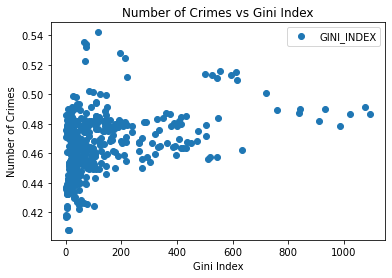

In [61]:
# Create scatterplot using matplotlib to explore variables relationship

df_clean.plot(x = 'TOTAL_CRIME', y='GINI_INDEX',style='o')
plt.title('Number of Crimes vs Gini Index')  
plt.xlabel('Gini Index')  
plt.ylabel('Number of Crimes')  
plt.show()

In [22]:
# Working Hypothesis:
# If a State has a higher Gini Index Value, they will report a higher number of hate crimes.

In [62]:
# Reshape relevant variables into NumPy arrays and put them in separate objects
X = df_clean['GINI_INDEX'].values.reshape(-1,1)
y = df_clean['TOTAL_CRIME'].values.reshape(-1,1)

In [63]:
# Print X
X

array([[0.4741],
       [0.4376],
       [0.4591],
       [0.475 ],
       [0.4866],
       [0.4548],
       [0.5024],
       [0.4509],
       [0.5115],
       [0.4808],
       [0.4795],
       [0.4397],
       [0.4337],
       [0.48  ],
       [0.4584],
       [0.4422],
       [0.45  ],
       [0.4764],
       [0.4978],
       [0.449 ],
       [0.4558],
       [0.4803],
       [0.4634],
       [0.4434],
       [0.4896],
       [0.4633],
       [0.4597],
       [0.44  ],
       [0.471 ],
       [0.4406],
       [0.4782],
       [0.4768],
       [0.5149],
       [0.4743],
       [0.4558],
       [0.4651],
       [0.4739],
       [0.45  ],
       [0.4745],
       [0.4628],
       [0.4747],
       [0.436 ],
       [0.4749],
       [0.4753],
       [0.4268],
       [0.4471],
       [0.469 ],
       [0.4577],
       [0.4644],
       [0.4391],
       [0.4345],
       [0.4859],
       [0.4322],
       [0.4613],
       [0.4845],
       [0.4912],
       [0.4561],
       [0.5014],
       [0.4587

In [64]:
# Print y
y

array([[5.000e+00],
       [1.500e+01],
       [2.090e+02],
       [3.400e+01],
       [1.020e+03],
       [2.170e+02],
       [8.600e+01],
       [2.200e+01],
       [2.220e+02],
       [1.140e+02],
       [1.070e+02],
       [4.100e+01],
       [2.400e+01],
       [6.500e+01],
       [9.600e+01],
       [1.000e+01],
       [7.800e+01],
       [1.460e+02],
       [3.700e+01],
       [1.900e+01],
       [2.200e+01],
       [3.890e+02],
       [4.340e+02],
       [1.070e+02],
       [2.700e+01],
       [9.500e+01],
       [3.700e+01],
       [4.600e+01],
       [4.400e+01],
       [1.600e+01],
       [9.870e+02],
       [5.400e+01],
       [6.120e+02],
       [2.390e+02],
       [1.800e+01],
       [3.920e+02],
       [3.400e+01],
       [1.760e+02],
       [4.100e+01],
       [1.700e+01],
       [6.900e+01],
       [2.000e+01],
       [1.330e+02],
       [4.760e+02],
       [4.000e+01],
       [3.300e+01],
       [1.680e+02],
       [5.430e+02],
       [5.300e+01],
       [7.500e+01],


In [65]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 5. Regression Analysis

In [66]:
# Create a regression object.
regression = LinearRegression()

In [67]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [68]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

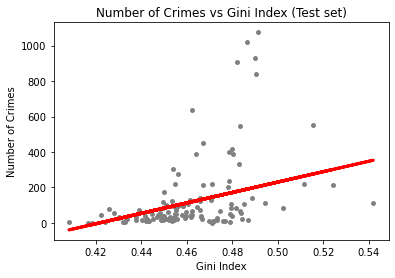

In [69]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Number of Crimes vs Gini Index (Test set)')
plot_test.xlabel('Gini Index')
plot_test.ylabel('Number of Crimes')
plot_test.show()

In [70]:
# The positive slope of the plot line suggests a positive relationship, as the Gini Index Value Increases, so too do the Number
# of crimes. However, there is a great degree of variance in the data - particularly when the Number of Crimes are low, that
# suggest there is not a linear relationship between the Gini Index Value and the Number of Crimes committed.

In [71]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)  

In [72]:
# Test performance of model by looking at model summary statistics.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2938.98911897]]
Mean squared error:  37249.161541765505
R2 score:  0.16189907725038954


In [73]:
# Create df comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,554.0,276.258507
1,57.0,182.210855
2,43.0,118.140892
3,127.0,143.416199
4,275.0,101.094755
5,143.0,196.905801
6,931.0,200.432587
7,26.0,95.216777
8,15.0,79.640135
9,63.0,88.751001


I don't have enough data points to conduct a regression analysis. Whilst my original data source is over 5,000, my choice to create aggregated crime totals has reduced the quantity of data points I have to work with. 

The descriptive statistics produced in relation to the models peformance support this view. The R2 score of 0.16 shows that this model isn't a good fit for my data. The large MSE value shows that there are a lot of data points that are far away from the line of best fit, this is also seen when we compare the predicted values to the actual values. 

A single regression line is not appropriate for predicting values here as we can see there is wide dispersion of data points. There are areas of the scatterplot that show a high density of points within the data and areas where the data points are sparse, further suggesting another model may be more appropriate.

### 6. Data Prep for Regression Analysis - Alternative Hypothesis

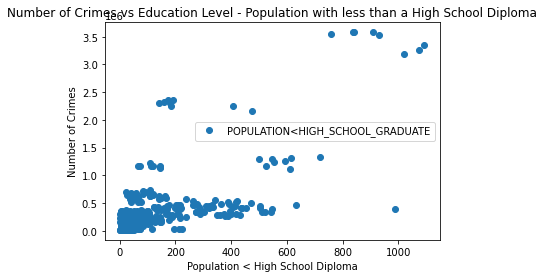

In [49]:
# Create scatterplot using matplotlib to explore variables relationship

df_clean.plot(x = 'TOTAL_CRIME', y='POPULATION<HIGH_SCHOOL_GRADUATE',style='o')
plt.title('Number of Crimes vs Education Level - Population with less than a High School Diploma')  
plt.xlabel('Population < High School Diploma')  
plt.ylabel('Number of Crimes')  
plt.show()

In [37]:
# Working Hypothesis:
# If a State has a higher population that did not attain a High School Diploma, they will report a higher number of hate crimes.

In [50]:
# Reshape relevant variables into NumPy arrays and put them in separate objects
X = df_clean['POPULATION<HIGH_SCHOOL_GRADUATE'].values.reshape(-1,1)
y = df_clean['TOTAL_CRIME'].values.reshape(-1,1)

In [51]:
# Print X
X

array([[ 294290],
       [  24260],
       [ 460254],
       [ 167437],
       [3197226],
       [ 232972],
       [ 148752],
       [  47029],
       [  28942],
       [1165234],
       [ 618844],
       [  40519],
       [  74809],
       [ 613568],
       [ 337596],
       [ 106567],
       [ 118245],
       [ 250109],
       [ 313667],
       [  37516],
       [ 272693],
       [ 267768],
       [ 403794],
       [ 166618],
       [ 191057],
       [ 261124],
       [  26943],
       [  74848],
       [ 223783],
       [  42751],
       [ 385431],
       [ 139037],
       [1105118],
       [ 573870],
       [  18539],
       [ 483615],
       [ 221995],
       [ 197848],
       [ 521495],
       [  51091],
       [ 281109],
       [  31095],
       [ 368208],
       [2154847],
       [ 107593],
       [  20445],
       [ 388492],
       [ 337436],
       [  94127],
       [ 197880],
       [  15282],
       [ 303858],
       [  22945],
       [ 448925],
       [ 170320],
       [32

In [52]:
# Print y
y

array([[5.000e+00],
       [1.500e+01],
       [2.090e+02],
       [3.400e+01],
       [1.020e+03],
       [2.170e+02],
       [8.600e+01],
       [2.200e+01],
       [2.220e+02],
       [1.140e+02],
       [1.070e+02],
       [4.100e+01],
       [2.400e+01],
       [6.500e+01],
       [9.600e+01],
       [1.000e+01],
       [7.800e+01],
       [1.460e+02],
       [3.700e+01],
       [1.900e+01],
       [2.200e+01],
       [3.890e+02],
       [4.340e+02],
       [1.070e+02],
       [2.700e+01],
       [9.500e+01],
       [3.700e+01],
       [4.600e+01],
       [4.400e+01],
       [1.600e+01],
       [9.870e+02],
       [5.400e+01],
       [6.120e+02],
       [2.390e+02],
       [1.800e+01],
       [3.920e+02],
       [3.400e+01],
       [1.760e+02],
       [4.100e+01],
       [1.700e+01],
       [6.900e+01],
       [2.000e+01],
       [1.330e+02],
       [4.760e+02],
       [4.000e+01],
       [3.300e+01],
       [1.680e+02],
       [5.430e+02],
       [5.300e+01],
       [7.500e+01],


In [53]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 7. Regression Analysis - Alternative Hypothesis

In [54]:
# Create a regression object.
regression = LinearRegression()

In [55]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [56]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

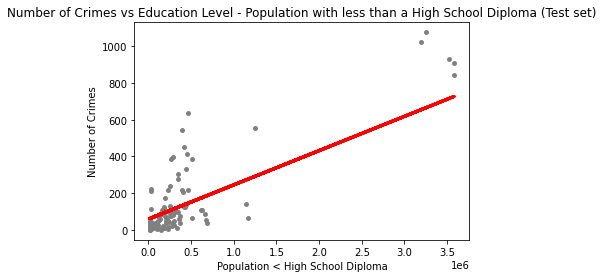

In [57]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Number of Crimes vs Education Level - Population with less than a High School Diploma (Test set)')
plot_test.xlabel('Population < High School Diploma')
plot_test.ylabel('Number of Crimes')
plot_test.show()

In [58]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [59]:
# Test performance of model by looking at model summary statistics.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00018615]]
Mean squared error:  14983.012821367105
R2 score:  0.66288430795745


In [60]:
# Create df comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,554.0,291.602359
1,57.0,186.152379
2,43.0,103.963064
3,127.0,136.338230
4,275.0,123.069771
5,143.0,271.698739
6,931.0,715.567397
7,26.0,73.784290
8,15.0,65.290786
9,63.0,125.454736


Whilst an R2 Score of 0.66 suggests that the model is a good fit, the slope, MSE score and comparison between actual values and predicted values tell a different story. The slope value is very close to zero, showing that as the population number with less than a high school diploma increases, the number of crimes stays the same. The large MSE value shows that there are a lot of data points that are far away from the line of best fit, this is also seen when we compare the predicted values to the actual values. The model does not seem to be a very good fit for the data here.